<a href="https://colab.research.google.com/github/Jaybhatt216/EIT/blob/main/Time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving Electric_Production.csv to Electric_Production.csv
User uploaded file "Electric_Production.csv" with length 7318 bytes


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime as dt
import seaborn as sns



In [3]:
df = pd.read_csv('/content/Electric_Production.csv')

In [4]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [5]:
df.shape

(397, 2)

In [6]:
df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


## rename to match time series convention date as ds and other as ts or time series

In [7]:
df= df.rename(columns={'DATE':'ds','IPG2211A2N': 'ts'})

In [8]:
df.head()

,ds,ts
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


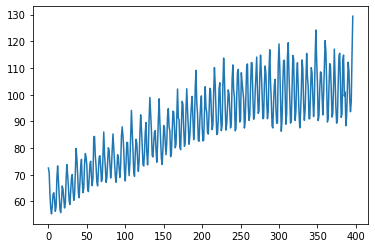

In [9]:
plt.figure()
plt.plot(df.ts)

from statsmodel . time series analysis .seasonal import seasonal decompse

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


decompose breaks all signals into seasonality, trend and hopefully a residual that is stationary

In [11]:
decomposition = seasonal_decompose(df['ts'],freq=48,extrapolate_trend=4    )

In [12]:
Decom_df = df
Decom_df.loc[:,"trend"]= decomposition.trend
Decom_df.loc[:,"seasonal"]= decomposition.seasonal
Decom_df.loc[:,"residuals"]= decomposition.resid

In [13]:
def plot_decomposition(df, ts,trend,seasonal, residual):
  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

  ax1.plot(df[ts], label = 'Original')
  ax1.legend(loc = 'best')
  ax1.tick_params(axis = 'x', rotation = 45)

  ax2.plot(df[trend], label = 'Trend')
  ax2.legend(loc = 'best')
  ax2.tick_params(axis = 'x', rotation = 45)

  ax3.plot(df[seasonal],label = 'Seasonality')
  ax3.legend(loc = 'best')
  ax3.tick_params(axis = 'x', rotation = 45)

  ax4.plot(df[residual], label = 'Residuals')
  ax4.legend(loc = 'best')
  ax4.tick_params(axis = 'x', rotation = 45)
  plt.tight_layout()

  #plt.subtitle('Signal Decomposition of %s' %(ts), x =0.5, y= 1.05, fontsize = 18)
  plt.show()

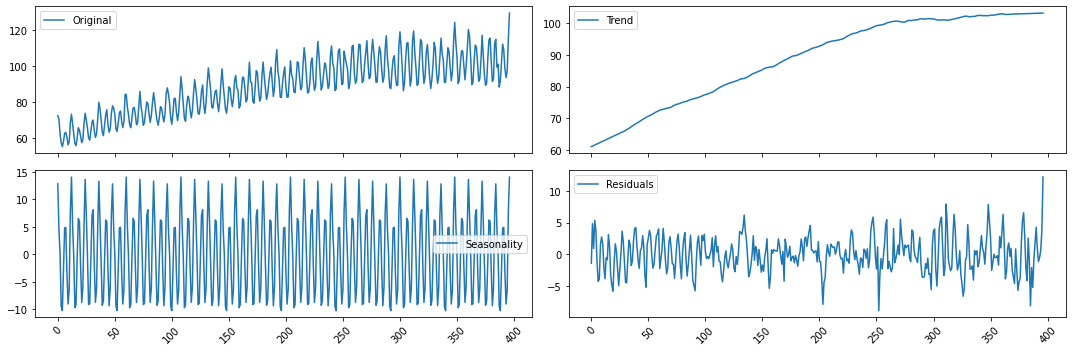

In [14]:
plot_decomposition(Decom_df,ts='ts',trend='trend',seasonal='seasonal',residual='residuals')

assume its good enough and do a dickey-fuller test
https://en.wikipedia.org/wiki/Dickey–Fuller_test

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
def test_stationarity(df, ts):

  rollmean = df[ts].rolling(window=12, center =False).mean()
  rolstd = df[ts].rolling(window=12, center = False).std()

  original = plt.plot(df[ts], color='blue', label ='original')
  mean = plt.plot(rollmean,
  color = 'red',
  label = 'Rolling Mean')
  std = plt.plot(rolstd,
  color = 'black',
  label = 'Rolling Std')
  plt.legend(loc = 'best')
  plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
  plt.xticks(rotation = 45)
  plt.show(block = False)
  plt.close()

  # Perform Dickey-Fuller test:
  # Null Hypothesis (H_0): time series is not stationary
  # Alternate Hypothesis (H_1): time series is stationary
  print ('Results of Dickey-Fuller Test:')
  dftest = adfuller(df[ts],
  autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],
  index = ['Test Statistic',
  'p-value',
  '# Lags Used',
  'Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)

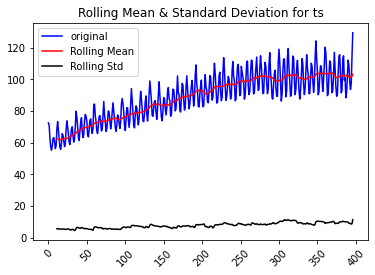

Results of Dickey-Fuller Test:
Test Statistic                  -2.256990
p-value                          0.186215
# Lags Used                     15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


In [17]:
test_stationarity(df, ts='ts')

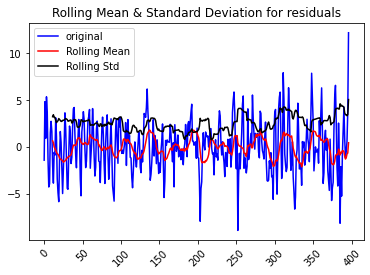

Results of Dickey-Fuller Test:
Test Statistic                -6.026113e+00
p-value                        1.454633e-07
# Lags Used                    1.500000e+01
Number of Observations Used    3.810000e+02
Critical Value (1%)           -3.447631e+00
Critical Value (5%)           -2.869156e+00
Critical Value (10%)          -2.570827e+00
dtype: float64


In [18]:
test_stationarity(Decom_df, ts='residuals')

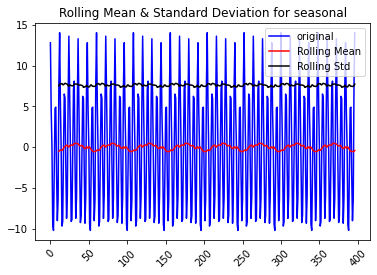

Results of Dickey-Fuller Test:
Test Statistic                  -5.079605
p-value                          0.000015
# Lags Used                     16.000000
Number of Observations Used    380.000000
Critical Value (1%)             -3.447676
Critical Value (5%)             -2.869176
Critical Value (10%)            -2.570838
dtype: float64


In [19]:
test_stationarity(Decom_df, ts='seasonal')

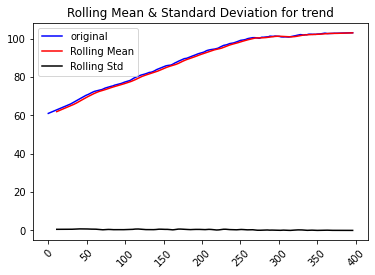

Results of Dickey-Fuller Test:
Test Statistic                  -3.266468
p-value                          0.016446
# Lags Used                     12.000000
Number of Observations Used    384.000000
Critical Value (1%)             -3.447495
Critical Value (5%)             -2.869096
Critical Value (10%)            -2.570795
dtype: float64


In [20]:
test_stationarity(Decom_df, ts='trend')

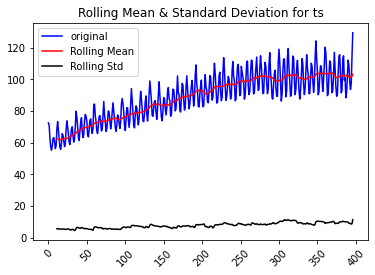

Results of Dickey-Fuller Test:
Test Statistic                  -2.256990
p-value                          0.186215
# Lags Used                     15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


In [21]:
test_stationarity(Decom_df, ts='ts')

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
def run_arima(df,ts,p,d,q):
  model = ARIMA(df[ts], order=(p,d,q),   )
  results = model.fit(disp=1)

  len_results = len(results.fittedvalues)
  ts_modified = df[ts][-len_results:]

  rss = sum((results.fittedvalues - ts_modified)**2)
  rmse = np.sqrt(rss/len(df[ts]))

  print("RMSE: ",rmse)
  plt.figure()
  plt.plot(df[ts])
  plt.plot(results.fittedvalues,color='red')
  plt.show()

  return results


In [24]:
stat_data_df = Decom_df.fillna(value=0)

RMSE:  2.052423342479331


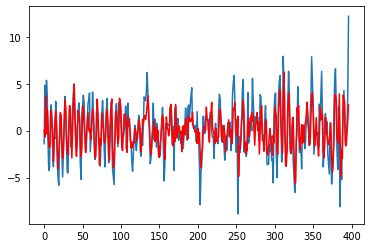

In [25]:
model_ar = run_arima(stat_data_df,ts="residuals", p=15,d=0,q=0   )

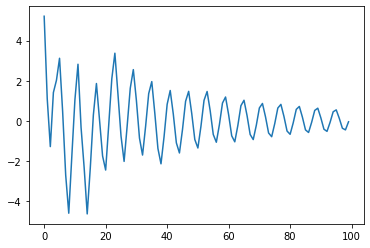

In [26]:
plt.figure()
plt.plot(model_ar.forecast(100)[0])

In [27]:
model_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              residuals   No. Observations:                  397
Model:                    ARMA(15, 0)   Log Likelihood                -847.300
Method:                       css-mle   S.D. of innovations              2.036
Date:                Thu, 11 Feb 2021   AIC                           1728.600
Time:                        14:19:18   BIC                           1796.327
Sample:                             0   HQIC                          1755.429
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0383      0.111      0.345      0.730      -0.179       0.255
ar.L1.residuals      0.5417      0.051     10.725      0.000       0.443       0.641
ar.L2.residuals     -0.1104      0.058     -1.899      0.058      -0.224       0.004
ar.L3.residuals      0.0038      0.058      0.065      0.948      -0.110       0.117
ar.L4.residuals     -0.0706      0.058     -1.226      0.221      -0.183       0.042
ar.L5.residuals      0.0078      0.057      0.137      0.891      -0.105       0.120
ar.L6.residuals      0.0808      0.057      1.417      0.157      -0.031       0.193
ar.L7.residuals     -0.0459      0.057     -0.810      0.418      -0.157       0.065
ar.L8.residuals     -0.1033      0.057     -1.824      0.069      -0.214       0.008
ar.L9.residuals     -0.1655      0.057     -2.905      0.004      -0.277      -0.054
ar.L10.residuals     0.1170      0.058      2.035      0.043       0.004       0.230
ar.L11.residuals     0.0049      0.058      0.084      0.933      -0.109       0.119
ar.L12.residuals     0.1680      0.059      2.834      0.005       0.052       0.284
ar.L13.residuals    -0.1834      0.060     -3.064      0.002      -0.301      -0.066
ar.L14.residuals     0.0279      0.061      0.459      0.646      -0.091       0.147
ar.L15.residuals    -0.2077      0.053     -3.927      0.000      -0.311      -0.104
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0400           -0.2386j            1.0670           -0.0359
AR.2             1.0400           +0.2386j            1.0670            0.0359
AR.3             0.8919           -0.5801j            1.0639           -0.0918
AR.4             0.8919           +0.5801j            1.0639            0.0918
AR.5             0.5083           -0.8855j            1.0210           -0.1671
AR.6             0.5083           +0.8855j            1.0210            0.1671
AR.7            -1.0607           -0.0000j            1.0607           -0.5000
AR.8            -0.9710           -0.5351j            1.1086           -0.4198
AR.9            -0.9710           +0.5351j            1.1086            0.4198
AR.10           -0.6971           -0.9263j            1.1593           -0.3527
AR.11           -0.6971           +0.9263j            1.1593            0.3527
AR.12            0.1102           -1.2256j            1.2305           -0.2357
AR.13            0.1102           +1.2256j            1.2305            0.2357
AR.14           -0.2847           -1.1268j            1.1622           -0.2894
AR.15           -0.2847           +1.1268j            1.1622            0.2894
------------------------------------------------------------------------------
"""

RMSE:  2.052423342479331


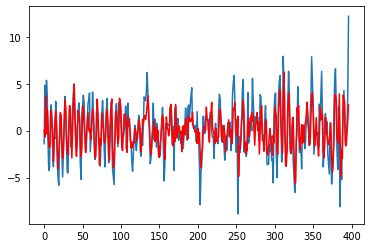

In [28]:
model_ar = run_arima(df,ts="residuals", p=15,d=0,q=0   )

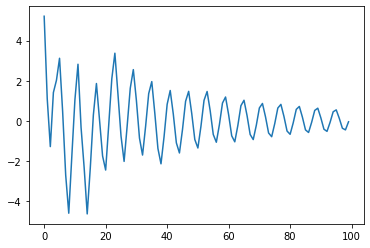

In [29]:
plt.figure()
plt.plot(model_ar.forecast(100)[0])

In [30]:
model_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              residuals   No. Observations:                  397
Model:                    ARMA(15, 0)   Log Likelihood                -847.300
Method:                       css-mle   S.D. of innovations              2.036
Date:                Thu, 11 Feb 2021   AIC                           1728.600
Time:                        14:19:58   BIC                           1796.327
Sample:                             0   HQIC                          1755.429
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0383      0.111      0.345      0.730      -0.179       0.255
ar.L1.residuals      0.5417      0.051     10.725      0.000       0.443       0.641
ar.L2.residuals     -0.1104      0.058     -1.899      0.058      -0.224       0.004
ar.L3.residuals      0.0038      0.058      0.065      0.948      -0.110       0.117
ar.L4.residuals     -0.0706      0.058     -1.226      0.221      -0.183       0.042
ar.L5.residuals      0.0078      0.057      0.137      0.891      -0.105       0.120
ar.L6.residuals      0.0808      0.057      1.417      0.157      -0.031       0.193
ar.L7.residuals     -0.0459      0.057     -0.810      0.418      -0.157       0.065
ar.L8.residuals     -0.1033      0.057     -1.824      0.069      -0.214       0.008
ar.L9.residuals     -0.1655      0.057     -2.905      0.004      -0.277      -0.054
ar.L10.residuals     0.1170      0.058      2.035      0.043       0.004       0.230
ar.L11.residuals     0.0049      0.058      0.084      0.933      -0.109       0.119
ar.L12.residuals     0.1680      0.059      2.834      0.005       0.052       0.284
ar.L13.residuals    -0.1834      0.060     -3.064      0.002      -0.301      -0.066
ar.L14.residuals     0.0279      0.061      0.459      0.646      -0.091       0.147
ar.L15.residuals    -0.2077      0.053     -3.927      0.000      -0.311      -0.104
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0400           -0.2386j            1.0670           -0.0359
AR.2             1.0400           +0.2386j            1.0670            0.0359
AR.3             0.8919           -0.5801j            1.0639           -0.0918
AR.4             0.8919           +0.5801j            1.0639            0.0918
AR.5             0.5083           -0.8855j            1.0210           -0.1671
AR.6             0.5083           +0.8855j            1.0210            0.1671
AR.7            -1.0607           -0.0000j            1.0607           -0.5000
AR.8            -0.9710           -0.5351j            1.1086           -0.4198
AR.9            -0.9710           +0.5351j            1.1086            0.4198
AR.10           -0.6971           -0.9263j            1.1593           -0.3527
AR.11           -0.6971           +0.9263j            1.1593            0.3527
AR.12            0.1102           -1.2256j            1.2305           -0.2357
AR.13            0.1102           +1.2256j            1.2305            0.2357
AR.14           -0.2847           -1.1268j            1.1622           -0.2894
AR.15           -0.2847           +1.1268j            1.1622            0.2894
------------------------------------------------------------------------------
"""

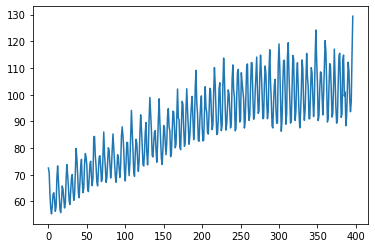

In [31]:
plt.figure()
plt.plot(df.ts )

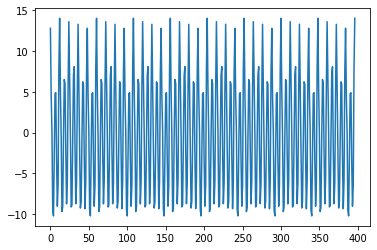

In [32]:
plt.figure()
plt.plot(Decom_df.seasonal )

Log values

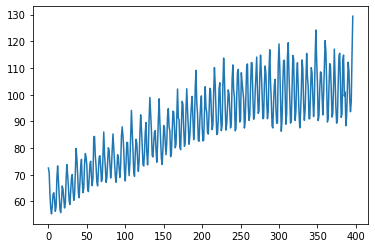

In [33]:
plt.figure()
plt.plot(df.ts )

In [34]:
def log_trans(df,ts):
  return df[ts].apply(lambda x:np.log(x))

In [35]:
df['ts_log']=log_trans(df,'ts')

In [36]:
df.head()

,ds,ts,trend,seasonal,residuals,ts_log
0,1/1/1985,72.5052,61.084498,12.816188,-1.395486,4.283658
1,2/1/1985,70.6720,61.252438,4.577778,4.841784,4.258049
2,3/1/1985,62.4502,61.420378,0.089879,0.939943,4.134369
3,4/1/1985,57.4714,61.588318,-9.478802,5.361884,4.051287
4,5/1/1985,55.3151,61.756258,-10.221375,3.780216,4.013046


In [37]:
Decompostion2 = seasonal_decompose(df['ts_log'], freq=48, extrapolate_trend=100)

In [44]:
type(Decompostion2)

statsmodels.tsa.seasonal.DecomposeResult

In [47]:
Decom_log = df
Decom_log.loc[:,"trend"]= Decompostion2.trend
Decom_log.loc[:,"seasonal"]= Decompostion2.seasonal
Decom_log.loc[:,"residuals"]= Decompostion2.resid

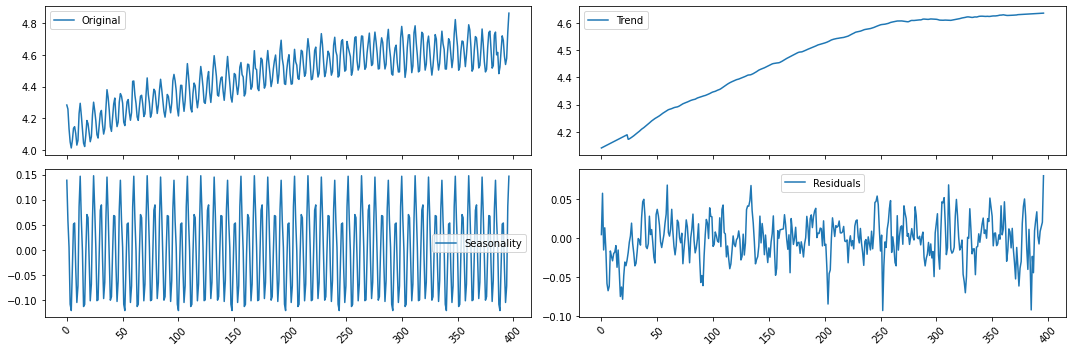

In [48]:
plot_decomposition(Decom_log,ts = 'ts_log',trend='trend',seasonal="seasonal",residual='residuals')

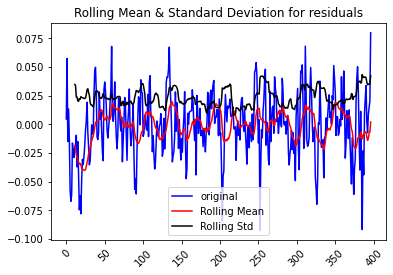

Results of Dickey-Fuller Test:
Test Statistic                  -4.956615
p-value                          0.000027
# Lags Used                     15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


In [49]:
test_stationarity(Decom_log,'residuals')

RMSE:  0.02112527879550343


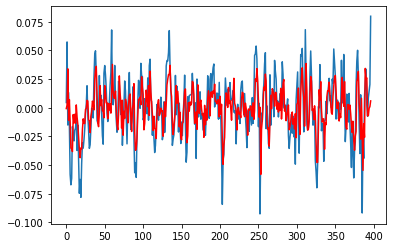

In [50]:
new_model_ar = run_arima(Decom_log,ts='residuals',p=15,d=0, q=0)

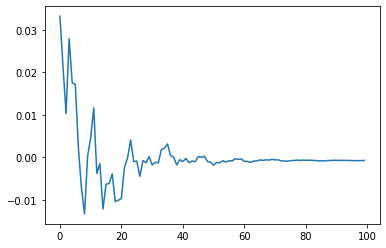

In [51]:
plt.figure()
plt.plot(new_model_ar.forecast(100)[0])

In [53]:
new_model_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              residuals   No. Observations:                  397
Model:                    ARMA(15, 0)   Log Likelihood                 968.492
Method:                       css-mle   S.D. of innovations              0.021
Date:                Thu, 11 Feb 2021   AIC                          -1902.984
Time:                        14:34:04   BIC                          -1835.258
Sample:                             0   HQIC                         -1876.156
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0007      0.002     -0.374      0.708      -0.005       0.003
ar.L1.residuals      0.5825      0.050     11.547      0.000       0.484       0.681
ar.L2.residuals     -0.0335      0.059     -0.568      0.570      -0.149       0.082
ar.L3.residuals      0.0493      0.059      0.838      0.402      -0.066       0.165
ar.L4.residuals     -0.0669      0.059     -1.140      0.255      -0.182       0.048
ar.L5.residuals     -0.0062      0.059     -0.105      0.916      -0.121       0.109
ar.L6.residuals      0.0498      0.058      0.857      0.392      -0.064       0.164
ar.L7.residuals     -0.0354      0.058     -0.609      0.543      -0.149       0.078
ar.L8.residuals     -0.0514      0.058     -0.883      0.378      -0.166       0.063
ar.L9.residuals     -0.0849      0.058     -1.451      0.148      -0.200       0.030
ar.L10.residuals     0.1531      0.059      2.603      0.010       0.038       0.268
ar.L11.residuals    -0.0010      0.059     -0.017      0.986      -0.118       0.116
ar.L12.residuals     0.1519      0.060      2.513      0.012       0.033       0.270
ar.L13.residuals    -0.1613      0.061     -2.652      0.008      -0.280      -0.042
ar.L14.residuals     0.0624      0.062      1.011      0.313      -0.059       0.183
ar.L15.residuals    -0.1525      0.053     -2.869      0.004      -0.257      -0.048
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0826           -0.1954j            1.1001           -0.0284
AR.2             1.0826           +0.1954j            1.1001            0.0284
AR.3             0.9006           -0.5628j            1.0620           -0.0889
AR.4             0.9006           +0.5628j            1.0620            0.0889
AR.5             0.5354           -0.9385j            1.0805           -0.1675
AR.6             0.5354           +0.9385j            1.0805            0.1675
AR.7            -1.0693           -0.0000j            1.0693           -0.5000
AR.8            -0.9720           -0.5424j            1.1131           -0.4190
AR.9            -0.9720           +0.5424j            1.1131            0.4190
AR.10           -0.6929           -0.9422j            1.1695           -0.3509
AR.11           -0.6929           +0.9422j            1.1695            0.3509
AR.12           -0.2752           -1.1422j            1.1749           -0.2876
AR.13           -0.2752           +1.1422j            1.1749            0.2876
AR.14            0.1606           -1.2725j            1.2826           -0.2300
AR.15            0.1606           +1.2725j            1.2826            0.2300
------------------------------------------------------------------------------
"""

In [55]:
len(Decom_log['trend'])

397

#Prophet
#https://facebook.github.io/prophet/docs/quick_start.html

In [56]:
from fbprophet import Prophet

In [57]:
Decom_log.head()

,ds,ts,trend,seasonal,residuals,ts_log
0,1/1/1985,72.5052,4.140351,0.138750,0.004558,4.283658
1,2/1/1985,70.6720,4.142459,0.058216,0.057375,4.258049
2,3/1/1985,62.4502,4.144567,0.004891,-0.015089,4.134369
3,4/1/1985,57.4714,4.146676,-0.108603,0.013215,4.051287
4,5/1/1985,55.3151,4.148784,-0.121196,-0.014541,4.013046


In [58]:
Decom_log['ds'] = pd.to_datetime(Decom_log['ds'], dayfirst=False)

In [59]:
Decom_log.head()

,ds,ts,trend,seasonal,residuals,ts_log
0,1985-01-01,72.5052,4.140351,0.138750,0.004558,4.283658
1,1985-02-01,70.6720,4.142459,0.058216,0.057375,4.258049
2,1985-03-01,62.4502,4.144567,0.004891,-0.015089,4.134369
3,1985-04-01,57.4714,4.146676,-0.108603,0.013215,4.051287
4,1985-05-01,55.3151,4.148784,-0.121196,-0.014541,4.013046


In [78]:
p_df = Decom_log[['ds','ts_log']]

In [79]:
p_df.head()

,ds,ts_log
0,1985-01-01,4.283658
1,1985-02-01,4.258049
2,1985-03-01,4.134369
3,1985-04-01,4.051287
4,1985-05-01,4.013046


In [80]:
p_df.columns = ['ds','y']

In [81]:
p_df.head()

,ds,y
0,1985-01-01,4.283658
1,1985-02-01,4.258049
2,1985-03-01,4.134369
3,1985-04-01,4.051287
4,1985-05-01,4.013046


In [82]:
p_model = Prophet(changepoint_prior_scale=200,weekly_seasonality=True,yearly_seasonality=True)
p_model.fit(p_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


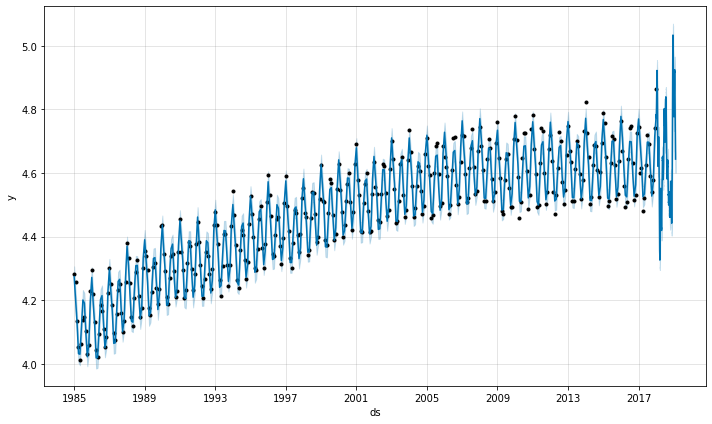

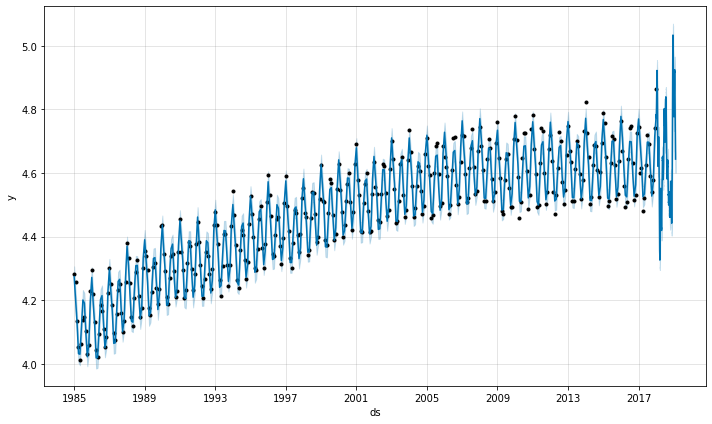

In [93]:
future_data = p_model.make_future_dataframe(periods=400)
forecast_data = p_model.predict(future_data)
p_model.plot(forecast_data)

In [90]:
forecast_data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1985-01-01,4.135352,4.241726,4.304826,4.135352,4.135352,0.138645,0.138645,0.138645,-0.002766,-0.002766,-0.002766,0.141410,0.141410,0.141410,0.0,0.0,0.0,4.273996
1,1985-02-01,4.134493,4.168520,4.229086,4.134493,4.134493,0.062415,0.062415,0.062415,0.002958,0.002958,0.002958,0.059457,0.059457,0.059457,0.0,0.0,0.0,4.196908
2,1985-03-01,4.133718,4.102167,4.161638,4.133718,4.133718,-0.002150,-0.002150,-0.002150,0.002958,0.002958,0.002958,-0.005108,-0.005108,-0.005108,0.0,0.0,0.0,4.131568
3,1985-04-01,4.132860,4.000135,4.062610,4.132860,4.132860,-0.101048,-0.101048,-0.101048,0.005699,0.005699,0.005699,-0.106748,-0.106748,-0.106748,0.0,0.0,0.0,4.031812
4,1985-05-01,4.132030,3.999069,4.060669,4.132030,4.132030,-0.102040,-0.102040,-0.102040,0.004187,0.004187,0.004187,-0.106227,-0.106227,-0.106227,0.0,0.0,0.0,4.029990


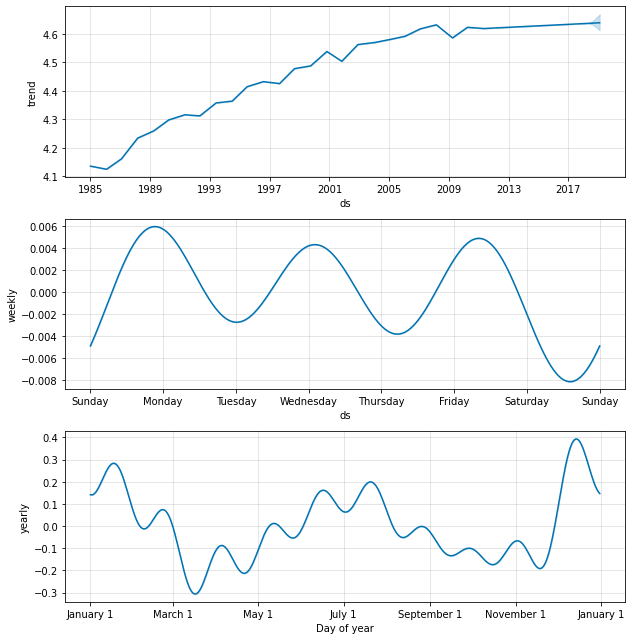

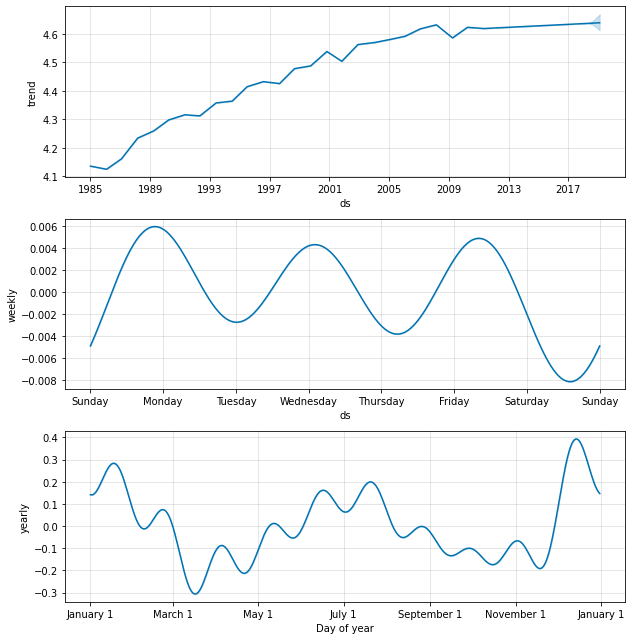

In [91]:
p_model.plot_components(forecast_data)